In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

/root/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/root/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
mnist = datasets.load_digits()
train_images, test_images, train_labels, test_labels \
= model_selection.train_test_split(mnist.data, mnist.target, test_size=0.2)

train_labels.size+test_labels.size

1797

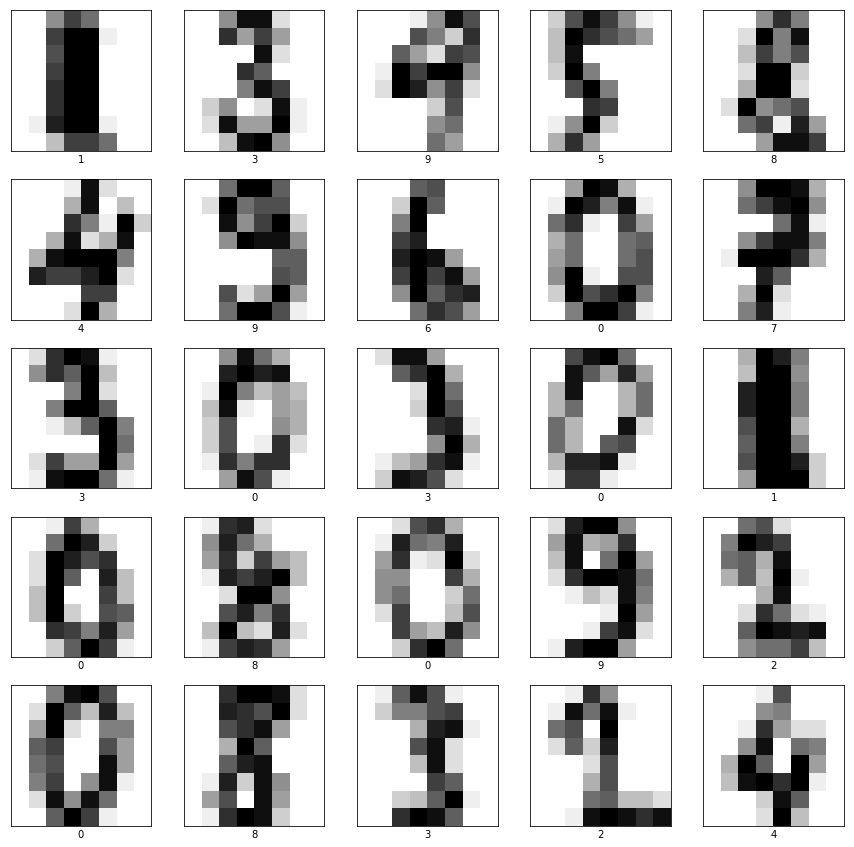

In [3]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i].reshape((8,8)), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

In [4]:
clf = SVC(verbose=True, random_state=2525)
clf.fit(train_images, train_labels)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=2525, shrinking=True,
  tol=0.001, verbose=True)

In [5]:
predicted_labels = clf.predict(test_images)
predicted_labels

array([3, 3, 3, 3, 0, 0, 3, 3, 3, 6, 3, 3, 4, 9, 3, 7, 3, 3, 3, 3, 3, 1,
       5, 3, 3, 3, 3, 3, 0, 3, 8, 6, 3, 6, 3, 3, 4, 6, 3, 3, 1, 3, 5, 6,
       2, 2, 0, 3, 3, 7, 3, 3, 5, 0, 3, 3, 7, 3, 3, 5, 2, 3, 3, 3, 3, 8,
       3, 3, 5, 0, 2, 3, 3, 6, 3, 3, 2, 2, 1, 3, 3, 9, 5, 3, 3, 3, 6, 3,
       3, 6, 3, 1, 3, 3, 5, 3, 3, 9, 3, 4, 2, 3, 3, 3, 4, 3, 3, 9, 3, 1,
       4, 3, 6, 3, 7, 4, 2, 6, 8, 0, 1, 3, 2, 3, 9, 3, 3, 6, 5, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 5, 5, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 3, 7,
       3, 3, 3, 3, 4, 5, 3, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 2, 7,
       1, 3, 3, 3, 4, 3, 5, 4, 5, 3, 3, 1, 3, 3, 3, 7, 3, 3, 3, 3, 3, 5,
       3, 0, 3, 3, 3, 9, 3, 0, 3, 5, 3, 3, 0, 6, 3, 3, 3, 3, 3, 3, 7, 3,
       0, 6, 6, 0, 3, 2, 0, 2, 3, 3, 8, 3, 3, 3, 3, 8, 3, 1, 3, 3, 3, 3,
       3, 3, 6, 3, 3, 5, 9, 1, 3, 6, 3, 3, 3, 6, 3, 3, 7, 3, 4, 3, 3, 3,
       7, 7, 0, 0, 3, 3, 5, 4, 3, 3, 3, 5, 3, 5, 3, 3, 3, 3, 3, 3, 3, 6,
       3, 9, 3, 3, 3, 6, 5, 2, 2, 3, 3, 6, 0, 3, 3,

In [6]:
print(f"acc: {clf.score(test_images, test_labels)}")

acc: 0.5111111111111111


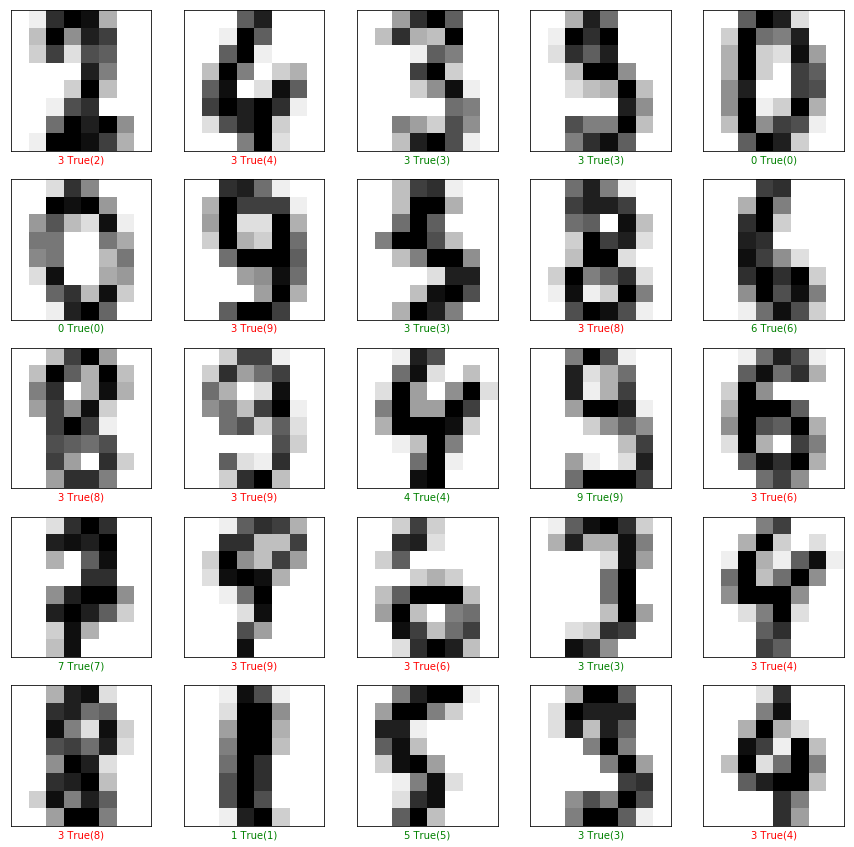

In [7]:
plt.figure(figsize=(15,15))

# 先頭から25枚テストデータを可視化
for i in range(25):
    
    # 画像を作成
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i].reshape((8,8)), cmap=plt.cm.binary)
    
    # 今プロットを作っている画像データの予測ラベルと正解ラベルをセット
    predicted_label = predicted_labels[i]
    true_label      = test_labels[i]
    
    # 予測ラベルが正解なら緑、不正解なら赤色を使う
    if predicted_label == true_label:
        color = 'green' # True label color
    else:
        color = 'red'   # False label color
    plt.xlabel("{} True({})".format(predicted_label, 
                                  true_label),
                                  color=color)

In [8]:
[x for x in range(-2,4)]

[-2, -1, 0, 1, 2, 3]

In [9]:
search_params = [
    {
        "kernel"          : ["rbf","linear","sigmoid"],
        "C"               : [10**i for i in range(-10,10)],
        "random_state"    : [2525],
    }
]

In [10]:
gs = GridSearchCV(SVC(), 
                  search_params, 
                  cv = 3,
                  verbose=True, 
                  n_jobs=-1)
gs.fit(train_images, train_labels)

print(gs.best_estimator_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s


SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=2525, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    3.7s finished


In [11]:
print(gs.best_estimator_.score(test_images,test_labels))
predicted_labels = gs.best_estimator_.predict(test_images)

0.9722222222222222


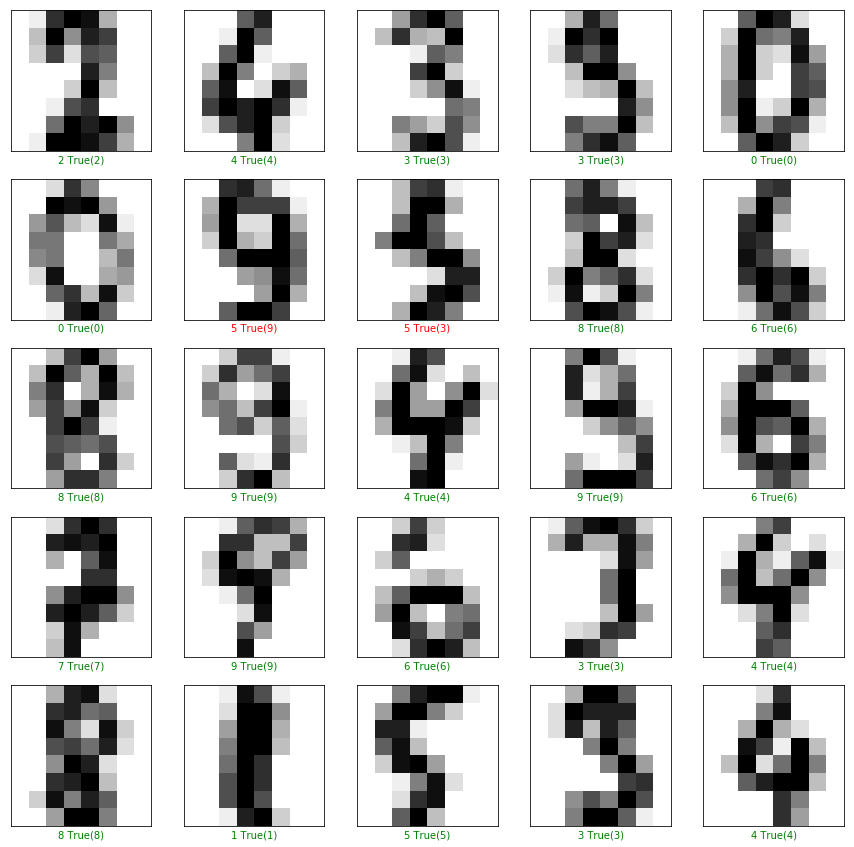

In [12]:
plt.figure(figsize=(15,15))

# 先頭から25枚テストデータを可視化
for i in range(25):
    
    # 画像を作成
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i].reshape((8,8)), cmap=plt.cm.binary)
    
    # 今プロットを作っている画像データの予測ラベルと正解ラベルをセット
    predicted_label = predicted_labels[i]
    true_label      = test_labels[i]
    
    # 予測ラベルが正解なら緑、不正解なら赤色を使う
    if predicted_label == true_label:
        color = 'green' # True label color
    else:
        color = 'red'   # False label color
    plt.xlabel("{} True({})".format(predicted_label, 
                                  true_label),
                                  color=color)

# SVM（回帰）

In [13]:
boston = datasets.load_boston()
train_data_bs, test_data_bs, train_labels_bs, test_labels_bs = model_selection.train_test_split(boston.data, boston.target, test_size=0.2)

In [14]:
rg = SVR()
rg.fit(train_data_bs,train_labels_bs)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [15]:
predicted_labels_bs = rg.predict(test_data_bs)
predicted_labels_bs

array([20.58608695, 21.05960088, 21.0589396 , 21.05966703, 21.0596082 ,
       21.05960942, 21.15790748, 20.95844527, 21.05960672, 20.83088345,
       21.05956584, 21.05960089, 21.060707  , 21.05939687, 21.05985078,
       21.06009668, 21.05960089, 20.13729806, 20.9807275 , 21.05961288,
       21.05960087, 20.78086968, 21.05960089, 20.60361765, 19.13016166,
       21.03590924, 21.05370213, 21.18101445, 21.29965872, 21.53846992,
       21.05484378, 21.37309043, 21.05968725, 21.43155843, 21.07067191,
       21.06513253, 19.88902628, 21.05960089, 21.0596009 , 21.06132092,
       21.05962418, 21.1312808 , 21.07768139, 20.26434171, 21.0597671 ,
       21.26820114, 21.05960089, 21.05774848, 20.79279285, 21.0948501 ,
       21.10225377, 21.07172735, 21.15099859, 21.09228878, 20.27472369,
       21.06081932, 21.05960121, 21.05960089, 21.05960093, 21.04898885,
       21.0589297 , 21.05960089, 21.06444964, 21.05960089, 21.57838595,
       21.05963276, 21.49080499, 21.05960089, 21.05983463, 21.13

In [16]:
rg.score(test_data_bs, test_labels_bs)

-0.05197800296597554

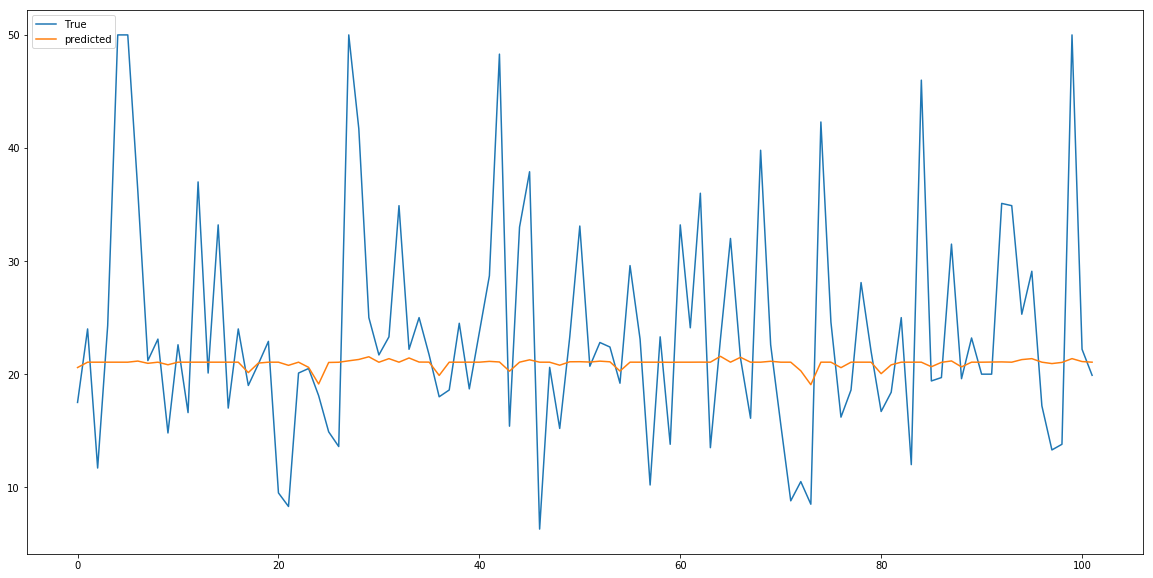

In [17]:
plt.figure(figsize=(20,10))
plt.plot(test_labels_bs,label="True")
plt.plot(predicted_labels_bs, label="predicted")
plt.legend()

In [18]:
from skopt import gp_minimize

In [19]:
search_params = [
        ["rbf","linear","sigmoid"],
        (2**-10, 2**10, "log-uniform"),
        (2**-10, 2**10, "log-uniform"),
        #"random_state"    : [2525],
]

In [20]:
def target_func(p):
    model = SVR(kernel=p[0], C=p[1], gamma=p[2])
    model.fit(train_data_bs, train_labels_bs)
    return model.score(test_data_bs, test_labels_bs) # この値を最大化するようにパラメタサーチします。

In [21]:
result = gp_minimize(
    target_func,
    search_params,
    acq_func="EI",
    n_calls=50,
    n_jobs=-1,
    verbose=True
)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.2575
Function value obtained: 0.6100
Current minimum: 0.6100
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0759
Function value obtained: 0.6003
Current minimum: 0.6003
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0070
Function value obtained: -0.0744
Current minimum: -0.0744
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0341
Function value obtained: -0.0749
Current minimum: -0.0749
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0080
Function value obtained: -0.0744
Current minimum: -0.0749
Iteration No: 6 started. Eval

In [22]:
predicted_labels_bs2 = gsr.best_estimator_.predict(test_data_bs)

NameError: name 'gsr' is not defined

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(test_labels_bs,label="True")
plt.plot(predicted_labels_bs2, label="predicted")
plt.legend()

In [ ]:
?gp_minimize